In [2]:
!pip show pymysql

Name: PyMySQL
Version: 1.0.2
Summary: Pure Python MySQL Driver
Home-page: https://github.com/PyMySQL/PyMySQL/
Author: yutaka.matsubara
Author-email: yutaka.matsubara@gmail.com
License: "MIT"
Location: c:\users\yousu\anaconda3\lib\site-packages
Requires: 
Required-by: 


In [3]:
sql = """
CREATE TABLE product (
    id INT UNSIGNED NOT NULL AUTO_INCREMENT,
    name VARCHAR(20) NOT NULL,
    model_num VARCHAR(10) NOT NULL,
    model_type VARCHAR(10) NOT NULL,
    PRIMARY KEY(id)
);
"""
print(sql)


CREATE TABLE product (
    id INT UNSIGNED NOT NULL AUTO_INCREMENT,
    name VARCHAR(20) NOT NULL,
    model_num VARCHAR(10) NOT NULL,
    model_type VARCHAR(10) NOT NULL,
    PRIMARY KEY(id)
);



In [4]:
import pymysql

db = pymysql.connect(host='localhost', port=3306, db='python_db', user='python',passwd='python',charset='utf8')
print(db)
cursor = db.cursor()
print(cursor)
cursor.execute(sql)
db.commit()

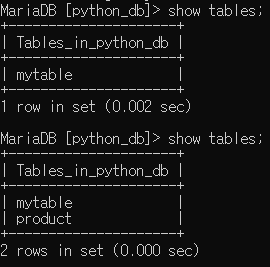

In [5]:
# cursor.execute('drop table product')
cursor.execute('show tables')

2

In [5]:
db.close()

In [6]:
import pymysql

#db와 연결
db = pymysql.connect(host='localhost', port=3306, db='python_db', user='python',passwd='python',charset='utf8')

# error가 발생할 수도 있기 때문에 try except구문 사용
try:
    #cursor 생성하고 cursor가 open되어 있는 query문을 여러 개 실행
    with db.cursor() as cursor:
        #table drop(table없애기)하는 query 실행
        cursor.execute('drop table product')
        #product table 생성 query실행
        cursor.execute(sql)
        #db에 실제로 적용한다
        db.commit()
        
        for num in range(10,20): # 10 ~ 19까지
            name = 'S20'+str(num)
            ins_sql = \
            'insert into product (name,model_num,model_type) values (%s, %s, %s)' # %s : 문자열
            # insert query 실행
            cursor.execute(ins_sql,(name,'7700','Phone'))
            print(ins_sql)
#           ins_sql = "insert into product (name,model_num,model_type) \
#           values('"+name+"','7700','Phone')"
#           cursor.execute(ins_sql)
            
        db.commit()
        print(cursor.lastrowid)
except Exception as exp:
    print(exp)
    db.rollback() # error가 나면 취소(rollback)
finally:
    db.close() # 연결 종료

insert into product (name,model_num,model_type) values (%s, %s, %s)
insert into product (name,model_num,model_type) values (%s, %s, %s)
insert into product (name,model_num,model_type) values (%s, %s, %s)
insert into product (name,model_num,model_type) values (%s, %s, %s)
insert into product (name,model_num,model_type) values (%s, %s, %s)
insert into product (name,model_num,model_type) values (%s, %s, %s)
insert into product (name,model_num,model_type) values (%s, %s, %s)
insert into product (name,model_num,model_type) values (%s, %s, %s)
insert into product (name,model_num,model_type) values (%s, %s, %s)
insert into product (name,model_num,model_type) values (%s, %s, %s)
10


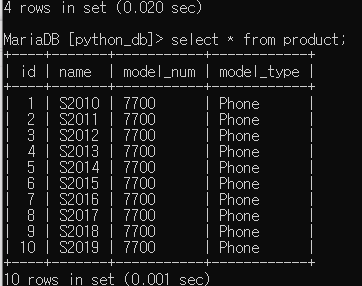

In [15]:
import pymysql

db = pymysql.connect(host='localhost', port=3306, db='python_db',\
                    user='python',passwd='python',charset='utf8')

try:
    #select, update
    with db.cursor() as cursor:
        cursor.execute('select * from product where id=3')
        result = cursor.fetchone()
        print(type(result),result, result[1])
        
        upd_sql = \
        "update product set model_type='%s' \
        where name between 'S2010' and 'S2015'" % '핸드폰'
        cursor.execute(upd_sql)
        db.commit()
        #갱신된 row 갯수
        print(cursor.rowcount)
        
        cursor.execute('select * from product')
        result_list = cursor.fetchall()
        print(type(result_list))
        for row in result_list:
            print(row[0],row[1],row[2],row[3])
            
        # model_type별로 group by 하는 쿼리 실행 
        cursor.execute('select model_type,count(*) from product group by model_type')
        for row in cursor.fetchall():
            print(row)
finally:
    db.close()

<class 'tuple'> (3, 'S2012', '7700', '핸드폰') S2012
0
<class 'tuple'>
1 S2010 7700 핸드폰
2 S2011 7700 핸드폰
3 S2012 7700 핸드폰
4 S2013 7700 핸드폰
5 S2014 7700 핸드폰
6 S2015 7700 핸드폰
7 S2016 7700 Phone
8 S2017 7700 Phone
9 S2018 7700 Phone
10 S2019 7700 Phone
('Phone', 4)
('핸드폰', 6)


In [30]:
# delete 하고 select all
#name 컬럼의 값이 's2014' 와 's2015' 인 행을 삭제하세요 sql의 in 구문을 사용하세요

con = pymysql.connect(host='localhost', port=3306, db='python_db',\
                    user='python',passwd='python',charset='utf8')

#print(type(con), con)

try:
    with con.cursor() as cursor:
        sql = "delete from product where name in (%s,%s)"
        cursor.execute(sql,('S2012','S2013'))
        con.commit()
        # 삭제된 건수 출력
        print(cursor.rowcount)
                
        sql = "select * from product order by id"
        cursor.execute(sql)
        for row in cursor.fetchall():
            print(row[0],row[1],row[2],row[3])
            
except Exception as ex:
    con.rollback()
    print(ex)
finally:
    con.close()

0
7 S2016 7700 Phone
8 S2017 7700 Phone
9 S2018 7700 Phone
10 S2019 7700 Phone
